# Introdução ao Dataset

O Breast Cancer Wisconsin Dataset (diagnóstico) é um conjunto de dados utilizado para classificar tumores mamários como benignos ou malignos. O dataset contém 569 instâncias, com 30 atributos numéricos extraídos de imagens digitalizadas de células cancerígenas. Esses atributos representam características como a textura, área e perímetro das células. O objetivo principal desse estudo é utilizar esse conjunto de dados para desenvolver e testar algoritmos de classificação, de modo a identificar se o tumor é benigno ou maligno. Para essa tarefa, foram aplicados três algoritmos: Árvore de Decisão, K-Nearest Neighbors (KNN) e Máquina de Vetores de Suporte (SVM).

Breast Cancer Wisconsin (Diagnostic): Um conjunto de dados de câncer de mama, com 30 características numéricas, classificando os tumores em malignos e benignos. <br>
Link para o dataset: [Breast Cancer Dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

# Árvore de Decisão

A Árvore de Decisão é um modelo de aprendizado supervisionado que realiza classificações através de uma série de decisões baseadas em condições sobre os atributos dos dados. No modelo utilizado, a árvore foi limitada a uma profundidade máxima de 4, o que significa que a árvore poderia realizar até 4 divisões nas características dos dados antes de chegar à previsão final. O critério utilizado para a divisão dos dados foi a entropia, que mede a impureza dos dados em cada nó da árvore.Durante a construção da árvore, as principais características utilizadas para fazer as divisões foram atributos como a textura e o tamanho das células, o que ajudou a separar os tumores benignos dos malignos. O modelo de Árvore de Decisão obteve uma acurácia de 0.95 no conjunto de teste, o que indica que foi capaz de classificar corretamente 95% das instâncias.

Acurácia (Árvore de Decisão): 0.95


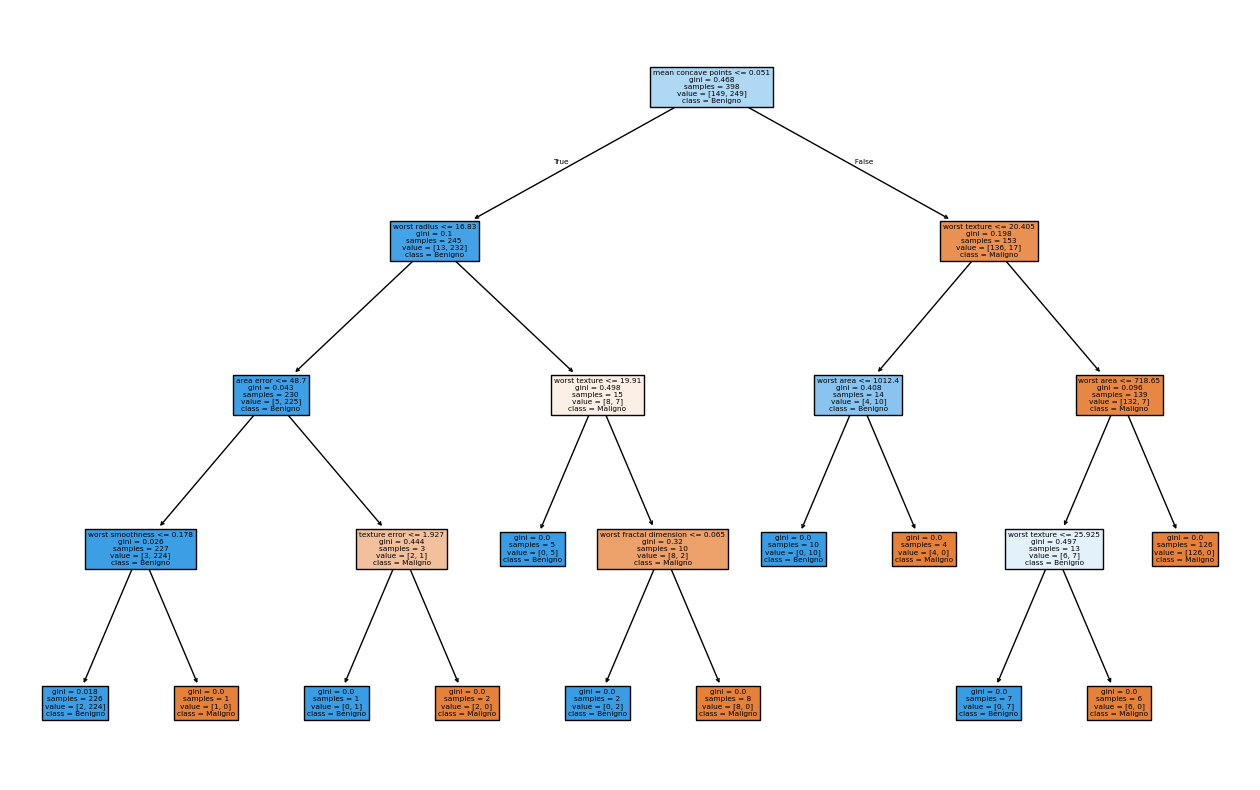

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset Breast Cancer
data = load_breast_cancer()

# Criar um DataFrame com os dados
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Algoritmo Decision Tree
clf_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
print(f"Acurácia (Árvore de Decisão): {accuracy_score(y_test, y_pred_tree):.2f}")

# Visualizar a árvore
plt.figure(figsize=(16, 10))
plot_tree(clf_tree, feature_names=X.columns, class_names=['Maligno', 'Benigno'], filled=True)
plt.show()



# K-Nearest Neighbors (KNN)


O K-Nearest Neighbors (KNN) é um algoritmo baseado em instâncias, onde a classe de uma instância é determinada pelos k vizinhos mais próximos no espaço de características. No modelo utilizado, o valor de k foi definido como 5, ou seja, para prever a classe de uma instância, o KNN verifica as 5 instâncias mais próximas e escolhe a classe mais frequente entre elas.Ao contrário da Árvore de Decisão, o KNN não realiza um treinamento explícito; em vez disso, ele utiliza as instâncias do conjunto de dados de treino diretamente para fazer previsões. Com esse modelo, a acurácia foi de 0.96, o que significa que o KNN foi capaz de classificar corretamente 96% das instâncias no conjunto de teste.


Acurácia (KNN): 0.96


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


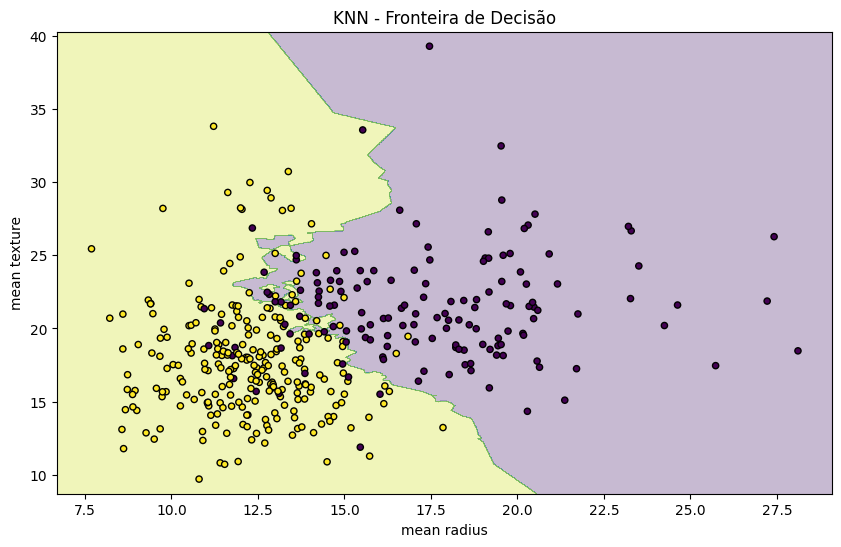

In [ ]:
# Algoritmo KNN
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
print(f"Acurácia (KNN): {accuracy_score(y_test, y_pred_knn):.2f}")

# Gráfico para KNN (apenas para 2 características)
plt.figure(figsize=(10, 6))
plt.title("KNN - Fronteira de Decisão")
X_train_subset = X_train.iloc[:, :2]  # Apenas duas features para visualização
clf_knn.fit(X_train_subset, y_train)

# Gerando a grade para o gráfico
h = .02  # Tamanho da grade
x_min, x_max = X_train_subset.iloc[:, 0].min() - 1, X_train_subset.iloc[:, 0].max() + 1
y_min, y_max = X_train_subset.iloc[:, 1].min() - 1, X_train_subset.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predição sobre a grade
Z = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando a fronteira de decisão
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_subset.iloc[:, 0], X_train_subset.iloc[:, 1], c=y_train, edgecolors='k', s=20)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()



Acurácia (KNN): 0.96


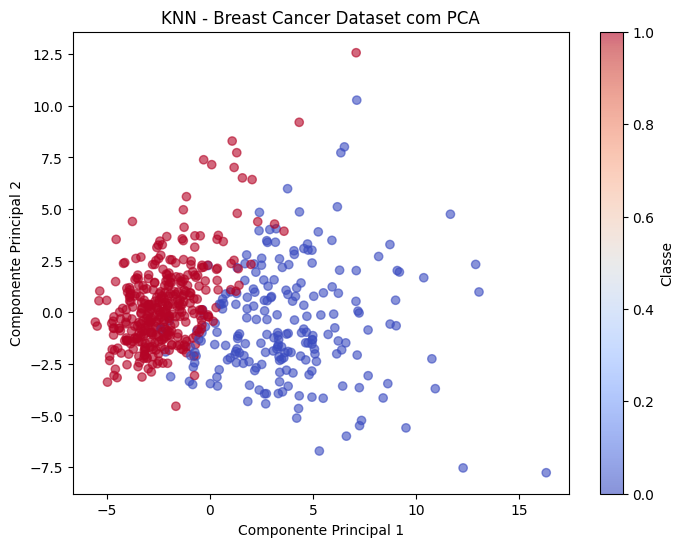

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Reduzindo a dimensionalidade para 2D usando PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalização dos dados

# Aplicando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Acurácia do KNN
print(f"Acurácia (KNN): {accuracy_score(y_test, y_pred_knn):.2f}")

# Plotando os resultados do KNN no espaço 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("KNN - Breast Cancer Dataset com PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Classe")
plt.show()

# Máquinas de Vetores de Suporte (SVM)

A Máquina de Vetores de Suporte (SVM) é um algoritmo de classificação que busca encontrar o hiperplano que melhor separa as instâncias de diferentes classes. No modelo SVM utilizado, foi empregado o kernel linear, o que significa que a separação entre as classes foi feita por meio de um plano reto no espaço de características.O modelo SVM foi treinado para separar os tumores benignos dos malignos, e os resultados obtidos mostraram que ele conseguiu realizar uma separação eficaz, alcançando uma acurácia de 0.96, igual ao KNN. Isso indica que o modelo SVM também foi capaz de classificar corretamente 96% das instâncias no conjunto de teste.

Acurácia (SVM): 0.96


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


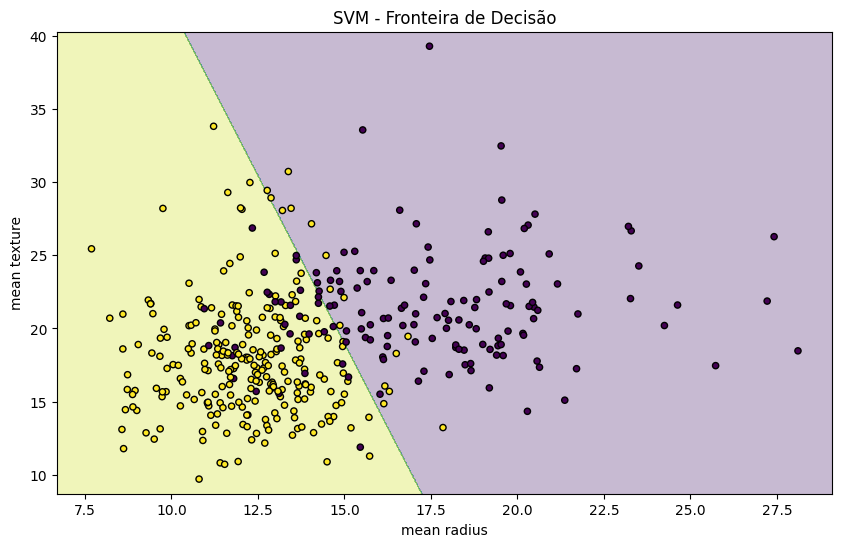

In [ ]:
# Algoritmo SVM
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
print(f"Acurácia (SVM): {accuracy_score(y_test, y_pred_svm):.2f}")

# Gráfico para SVM (apenas para 2 características)
plt.figure(figsize=(10, 6))
plt.title("SVM - Fronteira de Decisão")
X_train_subset = X_train.iloc[:, :2]  # Apenas duas features para visualização
clf_svm.fit(X_train_subset, y_train)

# Gerando a grade para o gráfico
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predição sobre a grade
Z = clf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando a fronteira de decisão
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_subset.iloc[:, 0], X_train_subset.iloc[:, 1], c=y_train, edgecolors='k', s=20)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

Acurácia (SVM): 0.96


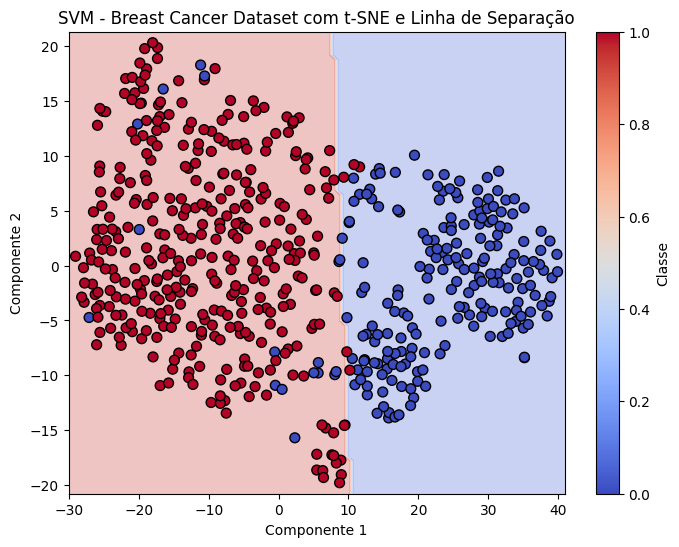

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Reduzindo a dimensionalidade para 2D com t-SNE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalizando os dados

# Aplicando t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.3, random_state=42)

# Treinando o modelo SVM com kernel linear
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Acurácia do SVM
print(f"Acurácia (SVM): {accuracy_score(y_test, y_pred_svm):.2f}")

# Plotando os resultados do SVM no espaço 2D
plt.figure(figsize=(8, 6))

# Gerando uma grade de pontos para visualizar o plano de decisão no espaço 2D
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Prevendo as classes para todos os pontos da grade
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando o plano de decisão
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plotando os pontos reais
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
plt.title("SVM - Breast Cancer Dataset com t-SNE e Linha de Separação")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label="Classe")
plt.show()




# Análise de Resultados

Os resultados obtidos foram os seguintes:


*  ### Árvore de Decisão: Acurácia de 0.95.
* ###  KNN: Acurácia de 0.96.
* ### SVM: Acurácia de 0.96.




A análise dos resultados revela que todos os três algoritmos apresentaram desempenhos muito próximos. O SVM e o KNN atingiram a mesma acurácia de 0.96, enquanto a Árvore de Decisão obteve uma acurácia ligeiramente inferior de 0.95. Essa diferença não foi significativa, sugerindo que, para esse conjunto de dados específico, todos os algoritmos apresentaram uma performance bastante similar na tarefa de classificação entre tumores benignos e malignos.
# Conclusão

Os resultados indicam que todos os três algoritmos de classificação foram eficazes na tarefa de classificar os tumores como benignos ou malignos, com desempenhos muito semelhantes entre si. A diferença na acurácia foi pequena, o que sugere que a complexidade do modelo (como no caso da Árvore de Decisão) e a escolha de parâmetros (como o valor de k no KNN) não tiveram um impacto significativo na precisão das previsões.Embora as técnicas utilizadas na construção dos modelos sejam diferentes, os resultados próximos indicam que, para este tipo específico de dados, não há um modelo claramente superior. A escolha do algoritmo pode, portanto, depender de outros fatores, como a necessidade de interpretabilidade (como no caso da Árvore de Decisão), o tempo de treinamento ou a complexidade computacional.Este estudo demonstra a viabilidade de utilizar esses algoritmos para problemas de classificação médica, destacando a importância de realizar testes comparativos para avaliar qual modelo oferece a melhor solução para dados específicos.